In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データを読み込む
train = np.loadtxt('data3.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

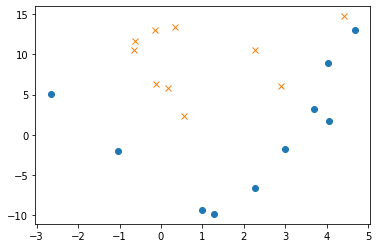

In [4]:
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'x')
plt.show()

In [5]:
# パラメータを初期化
theta = np.random.rand(4)

In [6]:
# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return (x - mu) / sigma

In [7]:
train_z = standardize(train_x)

In [8]:
# x0とx3を加える
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:,0,np.newaxis] ** 2
    return np.hstack([x0, x, x3])

In [13]:
X = to_matrix(train_z)

In [14]:
# シグモイド関数
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

In [18]:
# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

# 更新回数
count = 0

# 学習を繰り返す
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # ログの出力
    count += 1
    if count % 500 == 0:
        print('{}回目: theta = {}'.format(count, theta))

500回目: theta = [-2.70253598  1.58610317 -4.06392279  2.52242463]
1000回目: theta = [-2.81419539  1.63176139 -4.18833561  2.61072054]
1500回目: theta = [-2.91840639  1.67495074 -4.30590096  2.69350374]
2000回目: theta = [-3.016148    1.71601763 -4.41753082  2.77148818]
2500回目: theta = [-3.10821606  1.75523845 -4.52395728  2.84525335]
3000回目: theta = [-3.19526631  1.79283724 -4.62577801  2.91527663]
3500回目: theta = [-3.27784554  1.82899812 -4.72348801  2.98195631]
4000回目: theta = [-3.35641455  1.86387428 -4.81750232  3.04562849]
4500回目: theta = [-3.4313654   1.89759452 -4.90817281  3.10657958]
5000回目: theta = [-3.50303452  1.9302682  -4.99580057  3.16505579]


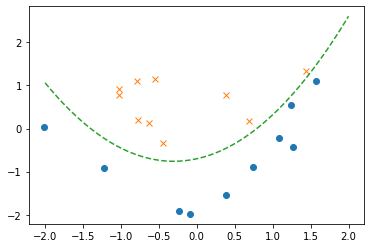

In [19]:
# プロットして確認
x1 = np.linspace(-2, 2, 100)
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x1, x2, linestyle='dashed')
plt.show()

In [20]:
# パラメータを初期化
theta = np.random.rand(4)

In [21]:
#1 精度の履歴
accuracies = []

In [25]:
# 分類関数
def classify(x):
    return (f(x) >= 0.5).astype(np.int64)

In [26]:
# 学習を繰り返す
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 現在の精度を計算
    result = classify(X) == train_y
    accuracy = len(result[result == True]) / len(result)
    accuracies.append(accuracy)

In [28]:
# 精度をプロット
x = np.arange(len(accuracies))

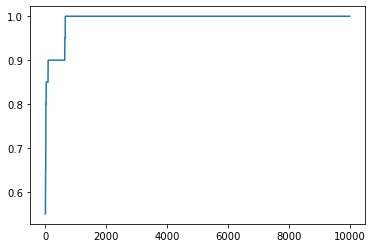

In [29]:
plt.plot(x, accuracies)

In [30]:
# パラメータを初期化
theta = np.random.rand(4)

In [40]:
# 学習を繰り返す
count = 0
for _ in range(epoch):
    # 確率的勾配降下法
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # ログの出力
    count += 1
    if count%500 == 0:
        print('{}回目: theta = {}'.format(count, theta))

500回目: theta = [-4.12537623  2.23520236 -5.79991863  3.68084154]
1000回目: theta = [-4.17321133  2.26019265 -5.86487573  3.72112558]
1500回目: theta = [-4.21977435  2.28474215 -5.92858842  3.76038435]
2000回目: theta = [-4.26511687  2.30890144 -5.99109701  3.79871685]
2500回目: theta = [-4.30931971  2.33266987 -6.05247488  3.83614414]
3000回目: theta = [-4.35242589  2.35608757 -6.11275987  3.87274349]
3500回目: theta = [-4.39451754  2.37913651 -6.17202597  3.90850987]
4000回目: theta = [-4.43561829  2.40186902 -6.23029327  3.94353274]
4500回目: theta = [-4.47579014  2.42427982 -6.28761769  3.97782338]
5000回目: theta = [-4.51507853  2.44638273 -6.34403668  4.01141753]


In [35]:
X.shape[0]

20

In [36]:
np.random.permutation(X.shape[0])

array([ 7,  2, 17, 10, 14, 15,  3,  6,  4, 13,  1,  5,  0, 16,  8, 18,  9,
       12, 19, 11])

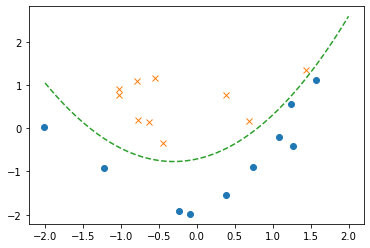

In [41]:
# プロットして確認
x1 = np.linspace(-2, 2, 100)
x2 = -(theta[0] + theta[1] * x1 + theta[3] * x1 ** 2) / theta[2]
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x1, x2, linestyle='dashed')
plt.show()